在本实验中，我们将对澳大利亚昆士兰教育培训就业部（DETE）和职业技术教育学院（TAFE）的员工进行离职调查。你可以在这里找到TAFE离职调查和这里的DETE调查。

TAFE的离职报告数据：

https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

DETE的离职报告数据：

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

我们将这些数据集进行了一些细微的修改，保证它们更易于使用。
修改内容包括：将编码格式更改为UTF-8（原来的编码格式为cp1252）

具体任务如下：

了解项目和数据集：
    本任务将主要按照如下内容展开分析：
* 那些只在研究院工作了很短一段时间的员工是否是由于存在某些不满而辞职?工作的更久一点的员工是否因存在不满而辞职？
* 年轻员工辞职是因为存在某种不满吗?老员工辞职是因为存在某种不满吗?

我们应当能够对这两个调查数据的结果进行综合考评，然后再回答上面的问题。我们的目标：完成大部分数据清理工作，并保证你可以开始分析第一个问题。
    数据集中没有提供数据字典。因此对于这个项目，将使用我们的个人常识来定义列。下面是我们将在dete_survey.csv中使用的一组列的解释:
* ID：用于识别调查参与者的id
* SeparationType：雇员雇佣关系终止的原因
* Cease Date：雇员结束工作的年或月
* DETE Start Date：雇员开始受雇于DETE的哪一年

下面是我们将在tafe_survey.csv中使用的一组列的基本解释：
* Record ID: 用于标识调查参与者的id
* Reason for ceasing employment: 雇员雇佣关系终止的原因
* LengthofServiceOverall：学院总工作年限（单位：年）：员工的工作年限（单位：年）

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
dete_survey = pd.read_csv('dete_survey.csv')
df1  = pd.DataFrame(dete_survey)

tafe_survey = pd.read_csv('tafe_survey.csv')
df2  = pd.DataFrame(tafe_survey)

print("数据的第一行为:\n",df1.iloc[0])
#输出CSV文件的前5行和最后5行，pandas默认的输出5行
print("\n数据的前5:\n",df1.head())
print("\n数据:\n",df1.info())
print("\n数据丢失数据:\n",df1.isnull())
print("\nID\n",dete_survey['ID'].value_counts())

数据的第一行为:
 ID                                                                     1
SeparationType                                     Ill Health Retirement
Cease Date                                                       08/2012
DETE Start Date                                                     1984
Role Start Date                                                     2004
Position                                                  Public Servant
Classification                                                   A01-A04
Region                                                    Central Office
Business Unit                          Corporate Strategy and Peformance
Employment Status                                    Permanent Full-time
Career move to public sector                                        True
Career move to private sector                                      False
Interpersonal conflicts                                            False
Job dissatisfaction                      

2. 识别缺失的数据和丢弃不必要的列：

通常，确定下一步如何对数据进行清洗和重塑都是比较关键且最困难的部分。但也不用太过担担心，后续我们将会提供一些步骤，并留有一些您自己的空间进行拓展。

In [5]:
dete_survey = pd.read_csv('dete_survey.csv',na_values=["Not Stated"])
tafe_survey = pd.read_csv('tafe_survey.csv',na_values=["Not Stated"])
dt = pd.DataFrame(dete_survey)
tf  = pd.DataFrame(tafe_survey)

dete_survey_updated = dt.drop(dt.columns[28:49], axis=1)
tafe_survey_updated = tf.drop(tf.columns[17:66], axis=1)

3. 清洗列名：

接下来，让我们将注意力转向列名。这两个dataframe包含许多类似的列，但是列名不同。下面是一些想用于最终分析的列：

因为最终想要合并这两个DataFrame，所以必须对列名进行标准化。回想一下，可以使用DataFrame.columns以及向量化的字符串方法，以一次性更新所有列。下面是之前的一个实例：

In [6]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

NameError: name 'happiness2017' is not defined

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.rstrip().str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [8]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('Record ID','id').str.replace('CESSATION YEAR','cease_date').str.replace('Reason for ceasing employment','separationtype').str.replace('Gender. What is your Gender?','gender').str.replace('CurrentAge. Current Age','age').str.replace('Employment Type. Employment Type','employment_status').str.replace('Classification. Classification','position').str.replace('LengthofServiceOverall. Overall Length of Service at Institute (in years)','institute_service').str.replace('LengthofServiceCurrent. Length of Service at current workplace (in years)','role_service')
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [9]:
print("\ndete_survey_updated的separationtype\n",dete_survey_updated['separationtype'].value_counts())
print("\ntafe_survey_updated的separationtype\n",tafe_survey_updated['separationtype'].value_counts())


dete_survey_updated的separationtype
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

tafe_survey_updated的separationtype
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [10]:
def extract_first_word(element):
    return str(element).split()[0]

dete_survey_updated = pd.DataFrame(dete_survey_updated)
#tf  = pd.DataFrame(tafe_survey)
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].apply(extract_first_word)
#dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.upper().str.split()
print(dete_survey_updated['separationtype'])

0                    Ill
1              Voluntary
2              Voluntary
3      Resignation-Other
4                    Age
             ...        
817                  Age
818                  Age
819     Resignation-Move
820                  Ill
821     Resignation-Move
Name: separationtype, Length: 822, dtype: object


In [11]:
dete_resignations = dete_survey_updated.copy()
tafe_resignations = tafe_survey_updated.copy()

In [12]:
print("\ndete_survey_updated的cease_date\n",dete_survey_updated['cease_date'].value_counts())


dete_survey_updated的cease_date
 2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
07/2014      2
04/2013      2
02/2014      2
08/2012      2
04/2014      2
11/2012      1
2010         1
2014         1
07/2006      1
07/2012      1
09/2014      1
09/2010      1
Name: cease_date, dtype: int64


In [13]:
pattern = r"([1-2][0-9]{3})"
# 根据指定pattern截取年份
years = dete_survey_updated['cease_date'].str.extract(pattern)
# 打印结果
print(years)
dete_survey_updated['cease_date'] = years.astype(float)

        0
0    2012
1    2012
2    2012
3    2012
4    2012
..    ...
817  2014
818  2014
819  2014
820  2013
821  2013

[822 rows x 1 columns]


In [14]:
print("\ndete_survey_updated的cease_date\n",dete_survey_updated['cease_date'].value_counts())
print("\ntafe_survey_updated的cease_date\n",tafe_survey_updated['cease_date'].value_counts())


dete_survey_updated的cease_date
 2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

tafe_survey_updated的cease_date
 2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64


In [15]:
print("\ndete_survey_updated的cease_date\n",dete_survey_updated['cease_date'].sort_index(ascending=True))
print("\ntafe_survey_updated的cease_date\n",tafe_survey_updated['cease_date'].sort_index(ascending=False))


dete_survey_updated的cease_date
 0      2012.0
1      2012.0
2      2012.0
3      2012.0
4      2012.0
        ...  
817    2014.0
818    2014.0
819    2014.0
820    2013.0
821    2013.0
Name: cease_date, Length: 822, dtype: float64

tafe_survey_updated的cease_date
 701    2013.0
700    2013.0
699    2013.0
698    2013.0
697    2013.0
        ...  
4      2010.0
3      2010.0
2      2010.0
1      2010.0
0      2010.0
Name: cease_date, Length: 702, dtype: float64


In [16]:
dete_survey_updated['institute_service'] = dete_survey_updated['cease_date'] - dete_survey_updated['dete_start_date']

In [17]:
print("\ntafe_survey_updated的Contributing Factors. Dissatisfaction\n",tafe_survey_updated['Contributing Factors. Dissatisfaction'].value_counts())
print("\ntafe_survey_updated的b)Contributing Factors. Job Dissatisfaction\n",tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].value_counts())


tafe_survey_updated的Contributing Factors. Dissatisfaction
 -                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

tafe_survey_updated的b)Contributing Factors. Job Dissatisfaction
 -                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [18]:
dete_survey_updated.any(axis=1, skipna=False)

0      True
1      True
2      True
3      True
4      True
       ... 
817    True
818    True
819    True
820    True
821    True
Length: 822, dtype: bool

In [19]:
tafe_survey_updated.any(axis=1, skipna=False)

0      True
1      True
2      True
3      True
4      True
       ... 
697    True
698    True
699    True
700    True
701    True
Length: 702, dtype: bool

In [20]:
dete_survey['dissatisfied'] = dete_survey.any(axis=1, skipna=False)
tafe_survey['dissatisfied'] = tafe_survey.any(axis=1, skipna=False)
dete_resignations_up = dete_survey['dissatisfied'].copy()
tafe_resignations_up = tafe_survey['dissatisfied'].copy()

In [21]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [22]:
combined = pd.concat([dete_survey_updated,tafe_survey_updated],axis =1)
print(combined)

      id     separationtype  cease_date  dete_start_date  role_start_date  \
0      1                Ill      2012.0           1984.0           2004.0   
1      2          Voluntary      2012.0              NaN              NaN   
2      3          Voluntary      2012.0           2011.0           2011.0   
3      4  Resignation-Other      2012.0           2005.0           2006.0   
4      5                Age      2012.0           1970.0           1989.0   
..   ...                ...         ...              ...              ...   
817  819                Age      2014.0           1977.0           1999.0   
818  820                Age      2014.0           1980.0           1980.0   
819  821   Resignation-Move      2014.0           2009.0           2009.0   
820  822                Ill      2013.0           2001.0           2009.0   
821  823   Resignation-Move      2013.0              NaN              NaN   

                                         position classification  \
0      

In [23]:
combined_updated = combined.dropna(axis=1, thresh=None)
print(combined_updated)

      id     separationtype  career_move_to_public_sector  \
0      1                Ill                          True   
1      2          Voluntary                         False   
2      3          Voluntary                         False   
3      4  Resignation-Other                         False   
4      5                Age                         False   
..   ...                ...                           ...   
817  819                Age                         False   
818  820                Age                         False   
819  821   Resignation-Move                         False   
820  822                Ill                         False   
821  823   Resignation-Move                         False   

     career_move_to_private_sector  interpersonal_conflicts  \
0                            False                    False   
1                            False                    False   
2                            False                    False   
3              

In [109]:
combined['institute_service'].astype(str)
combined['institute_service'].astype(float)

0      28.0
1       NaN
2       1.0
3       7.0
4      42.0
       ... 
817    37.0
818    34.0
819     5.0
820    12.0
821     NaN
Name: institute_service, Length: 822, dtype: float64

In [110]:
service_cat = combined['institute_service'].apply(extract_first_word)

In [111]:
print(combined_updated['dissatisfied'].value_counts().dropna(inplace=False))

True    822
Name: dissatisfied, dtype: int64


In [112]:
print(combined_updated.fillna(False))

      id     separationtype  career_move_to_public_sector  \
0      1                Ill                          True   
1      2          Voluntary                         False   
2      3          Voluntary                         False   
3      4  Resignation-Other                         False   
4      5                Age                         False   
..   ...                ...                           ...   
817  819                Age                         False   
818  820                Age                         False   
819  821   Resignation-Move                         False   
820  822                Ill                         False   
821  823   Resignation-Move                         False   

     career_move_to_private_sector  interpersonal_conflicts  \
0                            False                    False   
1                            False                    False   
2                            False                    False   
3              

In [113]:
pd.pivot_table(combined_updated,index=["dissatisfied"])

,career_move_to_private_sector,career_move_to_public_sector,dissatisfaction_with_the_department,employment_conditions,id,ill_health,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,none_of_the_above,physical_work_environment,relocation,study/travel,traumatic_incident,work_life_balance,work_location,workload
dissatisfied,,,,,,,,,,,,,,,,,,,
True,0.097324,0.026764,0.074209,0.041363,411.693431,0.136253,0.041363,0.108273,0.034063,0.069343,0.075426,0.26399,0.019465,0.082725,0.045012,0.034063,0.26399,0.032847,0.105839


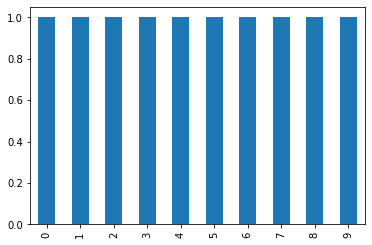

In [121]:
combined_updated[:10]['dissatisfied'].astype(float).plot(kind='bar')